In [124]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

import sys, os
sys.path.append("../..")
sys.path.append("..")
sys.path.append(os.getcwd())
from tslb.src.lzw import *
from tslb.src.utils import *
from tslb.src.continuous import *
from tslb.src.regModel import regModel as regModel
from sklearn.linear_model import LinearRegression

plt.rcParams.update({'font.size': 14})

In [82]:
ls = ["elec","financial","traffic"]

def import_data(string):
	train = pd.read_csv("../data/tspdb_data/{}_train.csv".format(string))
	test = pd.read_csv("../data/tspdb_data/{}_test.csv".format(string))
	return train, test

In [152]:
train, test = import_data(ls[1])

In [146]:
test.y

0      262.40
1      265.45
2      266.37
3      259.00
4      257.40
        ...  
175    290.02
176    291.95
177    290.79
178    291.86
179    293.54
Name: y, Length: 180, dtype: float64

In [148]:
def get_diff(series):
    return (series.shift(-1) - series)[:-1]

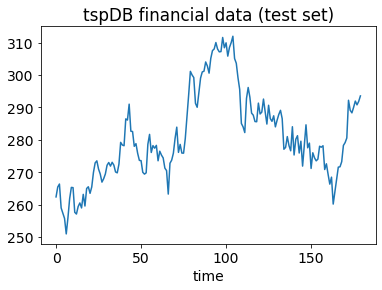

In [157]:
plt.title("tspDB financial data (test set)")
plt.plot((test.y))
plt.xlabel("time")
# plt.ylabel("financial")
plt.show()

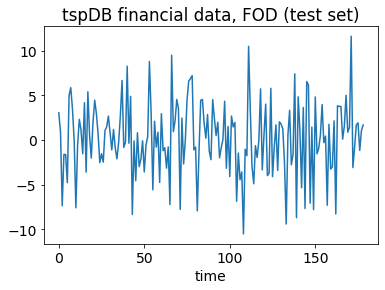

In [156]:
plt.title("tspDB financial data, FOD (test set)")
plt.plot(get_diff(test.y))
plt.xlabel("time")
# plt.ylabel()
plt.show()

compression ratio:  0.3016759776536313
plot
estimated entropy =  1.0099700154591162
compression ratio =  0.3016759776536313
reg.predict(est)  =  [0.30014006]


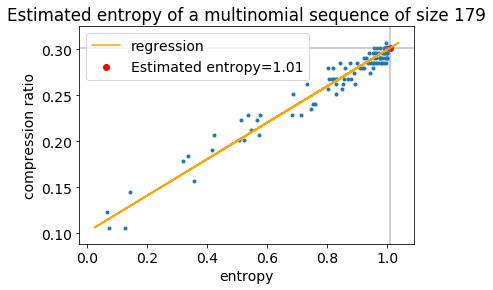

Lower Bound:  0.4634880657530684
compression ratio:  0.4134078212290503
plot
estimated entropy =  1.7025983809143768
compression ratio =  0.4134078212290503
reg.predict(est)  =  [0.41431886]


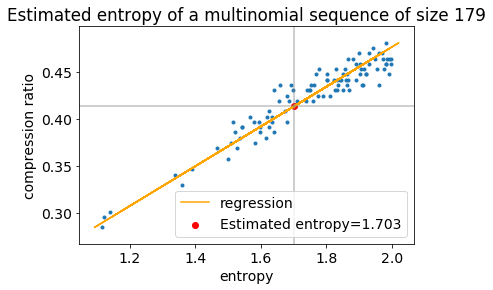

Lower Bound:  0.4476882275137213
compression ratio:  0.5698324022346368
plot
estimated entropy =  2.6254520204924168
compression ratio =  0.5698324022346368
reg.predict(est)  =  [0.5740875]


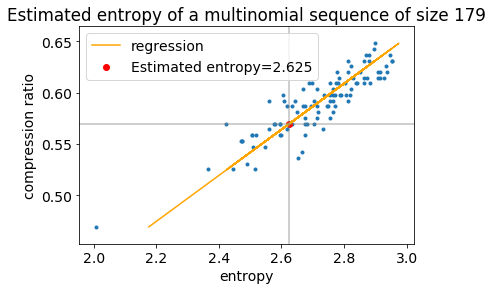

Lower Bound:  0.5863825121670572
compression ratio:  0.7374301675977654
plot
estimated entropy =  3.6755342313040815
compression ratio =  0.7374301675977654
reg.predict(est)  =  [0.74635308]


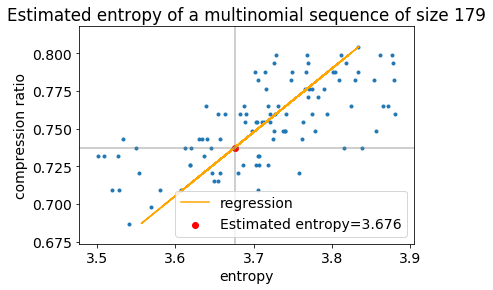

Lower Bound:  0.7224504238863613
compression ratio:  0.8938547486033519
plot
estimated entropy =  4.714218366604873
compression ratio =  0.8938547486033519
reg.predict(est)  =  [0.89239251]


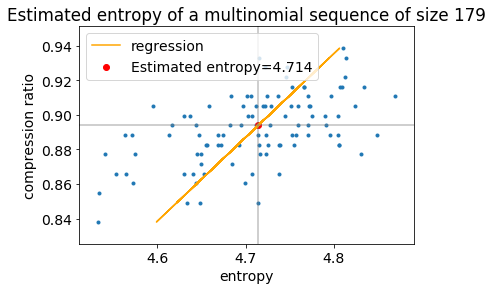

Lower Bound:  0.8096414622797754


In [159]:
samples = 100

lbs=[]
for k in [1,2,3,4,5]:

    n= 2**k

    #####
    seq = get_diff(test.y)
    size = len(seq)
    #####

    myRegModel = regModel(n, size, samples)
    myRegModel.fit(plot=False)


    # discretize the sequence
    discretized_seq, categories = discretize(seq, n)

    # convert format and get p_tilda
    uncomp_numbers = list(discretized_seq)
    ratio = lzw_compression_ratio(uncomp_numbers, n)
    ent = myRegModel.get_entropy(ratio, "a multinomial sequence", True)
    lb = h_inverse(ent, n, a=0.001)
    lbs.append(lb)
    print("Lower Bound: ", lb)

In [166]:
e1=[]
e2=[]
e3=[]
for k in [1,2,3,4,5]:

    n= 2**k

    seq_test, categories = discretize(get_diff(test.y), n)

    seq_lstm, categories2 = cut(get_diff(test.yhat_lstm), categories)
    seq_deepar, categories2 = cut(get_diff(test.yhat_deepar), categories)
    seq_tspdb, categories2 = cut(get_diff(test.yhat_tspdb), categories)

    e1.append(get_error(seq_test, seq_lstm))
    e2.append(get_error(seq_test, seq_deepar))
    e3.append(get_error(seq_test, seq_tspdb))
    
#     print("n = ", n)
#     print(e1)
#     print(e2)
#     print(e3)
#     print()

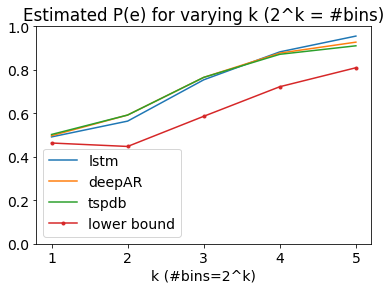

In [167]:
plt.title("Estimated P(e) for varying k (2^k = #bins)")
plt.plot(e1, label="lstm")
plt.plot(e2, label="deepAR")
plt.plot(e3, label="tspdb")
plt.plot(lbs, marker='.', label="lower bound")
plt.ylim(0,1)
plt.xticks(np.arange(5),np.arange(1,6))
plt.xlabel("k (#bins=2^k)")
plt.legend()
plt.show()

In [164]:
lbs

[0.4634880657530684,
 0.4476882275137213,
 0.5863825121670572,
 0.7224504238863613,
 0.8096414622797754]

In [97]:
seq_lstm

0       2
1       1
2       1
3       1
4       3
       ..
163    19
164    13
165    12
166     9
167     6
Name: yhat_lstm, Length: 168, dtype: category
Categories (32, int64): [0 < 1 < 2 < 3 ... 28 < 29 < 30 < 31]

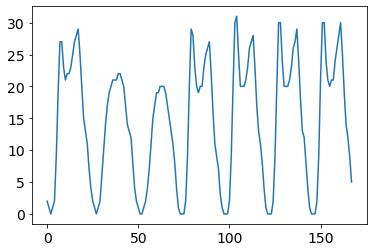

In [101]:
plt.plot(discretized_seq)

In [103]:
train.y_train

0        0.007750
1        0.005533
2        0.004083
3        0.004283
4        0.010217
           ...   
10387    0.066650
10388    0.051200
10389    0.046200
10390    0.035633
10391    0.023383
Name: y_train, Length: 10392, dtype: float64

In [ ]:
samples = 100

lbs=[]
# for k in [1,2,3,4,5]:
k=3

n= 2**k

#####
seq = train.y_train
size = len(seq)
#####

myRegModel = regModel(n, size, samples)
myRegModel.fit(plot=False)


# discretize the sequence
discretized_seq, categories = discretize(seq, n)

# convert format and get p_tilda
uncomp_numbers = list(discretized_seq)
ratio = lzw_compression_ratio(uncomp_numbers, n)
ent = myRegModel.get_entropy(ratio, "a multinomial sequence", True)
lb = h_inverse(ent, n, a=0.001)
lbs.append(lb)
print("Lower Bound: ", lb)